#Preprocessing

##Improt Libraries Yang diperlukan

In [239]:
#import the libraries
import numpy as np                ## linear algebra
import pandas as pd               ## data processing, dataset file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt   ## data visualization & graphical plotting
import seaborn as sns

#From Sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer

#Hierarchy
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as sch
import scipy.cluster.hierarchy as shc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

##Load Data Customer Mall

In [240]:
#Load Data Customer Personality Analysis
data = pd.read_csv('/content/Mall_Customers.csv')
#Lihat 5 baris pertama data
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


##Melihat Info Data

In [241]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


##Drop Data atau Pengapusan Data

In [242]:
dropdata = 'CustomerID'
databaru = data.drop(dropdata, axis=1)
databaru.head(10)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
5,Female,22,17,76
6,Female,35,18,6
7,Female,23,18,94
8,Male,64,19,3
9,Female,30,19,72


In [243]:
data.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

##Encode atau Permisalan Data

In [244]:
#Encode atau Permisalan pada data Gender
encode = databaru['Gender'].unique()
pemetaan = {nilai: urutan for urutan, nilai in enumerate(encode, start=1)}
databaru['Gender'] = databaru['Gender'].map(pemetaan)

#Lihat 5 baris pertama data
databaru.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,2,20,16,6
3,2,23,16,77
4,2,31,17,40


In [245]:
print(databaru.shape)

(200, 4)


##Describe Data

In [246]:
#Lihat statistik data
databaru.describe()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,1.560000,38.850000,60.560000,50.200000
std,0.497633,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,1.000000,28.750000,41.500000,34.750000
50%,2.000000,36.000000,61.500000,50.000000
75%,2.000000,49.000000,78.000000,73.000000
max,2.000000,70.000000,137.000000,99.000000


In [247]:
databaru.dtypes

Gender                    int64
Age                       int64
Annual Income (k$)        int64
Spending Score (1-100)    int64
dtype: object

##Missing Value

In [248]:
missing_value = databaru.isnull().sum()
missing_value

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

##Cek Data Duplikat

In [249]:
print(databaru[databaru.duplicated(keep=False)])

Empty DataFrame
Columns: [Gender, Age, Annual Income (k$), Spending Score (1-100)]
Index: []


##Normalisasi Data

In [250]:
#List nama feature
nama_kolom = ['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

In [251]:
#Standarisasi feature
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
standardized = scaler.fit_transform(databaru)

stardardized_data = pd.DataFrame(standardized, columns = nama_kolom)
stardardized_data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,-1.128152,-1.424569,-1.738999,-0.434801
1,-1.128152,-1.281035,-1.738999,1.195704
2,0.886405,-1.352802,-1.700830,-1.715913
3,0.886405,-1.137502,-1.700830,1.040418
4,0.886405,-0.563369,-1.662660,-0.395980


##Visualisasi Normalisasi Data

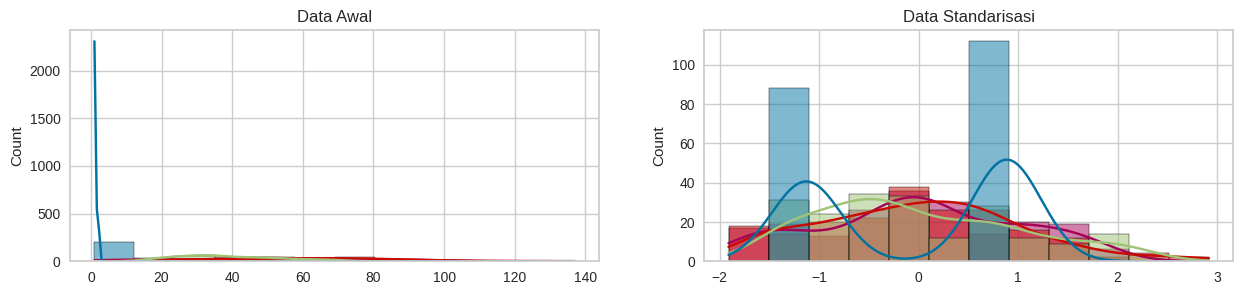

In [252]:
# plot both together to compare
fig, ax = plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(databaru, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Data Awal")
sns.histplot(stardardized_data, ax=ax[1], kde=True, legend=False)
ax[1].set_title("Data Standarisasi")
plt.show()

#Metode Hirarki

##Pengaplikasian Elbow Method

In [270]:
hc = AgglomerativeClustering(n_clusters = 4, metric = 'euclidean', linkage ='ward')
y_hc = hc.fit_predict(stardardized_data)
y_hc

array([2, 2, 3, 1, 1, 1, 3, 1, 0, 1, 0, 1, 3, 1, 0, 2, 3, 2, 0, 1, 0, 2,
       3, 2, 3, 2, 3, 2, 3, 1, 0, 1, 0, 2, 3, 1, 3, 1, 3, 1, 3, 2, 0, 1,
       3, 1, 3, 1, 1, 1, 3, 2, 1, 0, 3, 0, 3, 0, 1, 0, 0, 2, 3, 3, 0, 2,
       3, 3, 2, 1, 0, 3, 3, 3, 0, 2, 3, 0, 1, 3, 0, 2, 0, 3, 1, 0, 3, 1,
       1, 3, 3, 2, 0, 3, 1, 2, 3, 1, 0, 2, 1, 3, 0, 2, 0, 1, 3, 0, 0, 0,
       0, 1, 3, 2, 1, 1, 3, 3, 3, 3, 2, 3, 1, 2, 1, 1, 0, 2, 0, 2, 0, 2,
       1, 1, 0, 1, 3, 2, 0, 1, 3, 2, 1, 1, 0, 2, 0, 1, 3, 2, 0, 2, 3, 1,
       3, 1, 0, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 1, 3, 2, 0, 2, 0, 2, 3, 1,
       0, 2, 0, 2, 3, 1, 0, 1, 3, 2, 3, 2, 3, 1, 3, 1, 0, 1, 3, 1, 3, 2,
       0, 2])

In [271]:
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(stardardized_data)

In [272]:
pca_data = pd.DataFrame(data = X_pca, columns = [f'PC{i+1}' for i in range(X_pca.shape[1])])
pca_data.head()

,PC1,PC2
0,-1.327685,-0.472503
1,-2.167385,-0.360578
2,-0.237646,-1.874856
3,-1.048828,-1.713156
4,0.059529,-1.832216


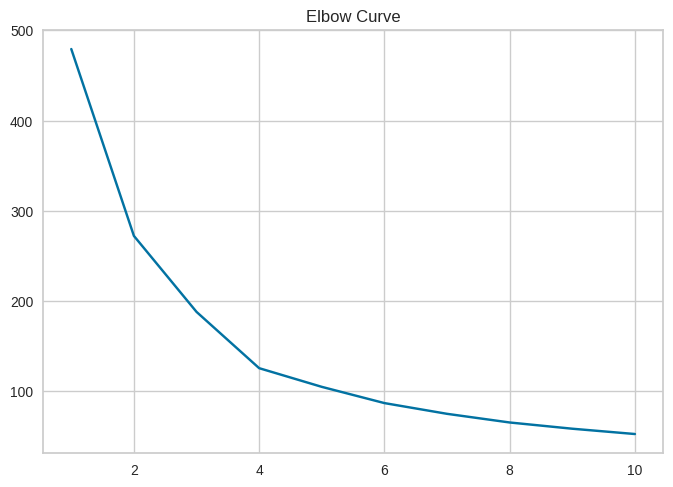

In [273]:
x = stardardized_data

from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Curve')
plt.show()

In [274]:
klustering = 4
kmeans = KMeans(n_clusters=klustering, init='k-means++', max_iter=10, n_init=10, random_state=0)
kmeans.fit(x)
y_predict= kmeans.fit_predict(x)
y_predict

array([2, 2, 3, 1, 1, 1, 3, 1, 0, 1, 0, 1, 3, 1, 0, 2, 3, 2, 0, 1, 0, 2,
       3, 2, 3, 2, 3, 2, 3, 1, 0, 1, 0, 2, 3, 1, 3, 1, 3, 1, 3, 2, 0, 1,
       3, 1, 3, 1, 1, 1, 3, 2, 1, 0, 3, 0, 3, 0, 1, 0, 0, 2, 3, 3, 0, 2,
       3, 3, 2, 1, 0, 3, 3, 3, 0, 2, 3, 0, 1, 3, 0, 2, 0, 3, 1, 0, 3, 1,
       1, 3, 3, 2, 0, 3, 1, 2, 3, 1, 0, 2, 1, 3, 0, 2, 0, 1, 3, 0, 0, 0,
       0, 1, 3, 2, 1, 1, 3, 3, 3, 3, 2, 3, 1, 2, 1, 1, 0, 2, 0, 2, 0, 2,
       1, 1, 0, 1, 3, 2, 0, 1, 3, 2, 1, 1, 0, 2, 0, 1, 3, 2, 0, 2, 3, 1,
       3, 1, 0, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 1, 3, 2, 0, 2, 0, 2, 3, 1,
       0, 2, 0, 2, 3, 1, 0, 1, 3, 2, 3, 2, 3, 1, 3, 1, 0, 1, 3, 1, 3, 2,
       0, 2], dtype=int32)

In [275]:
x['Cluster'] = kmeans.labels_

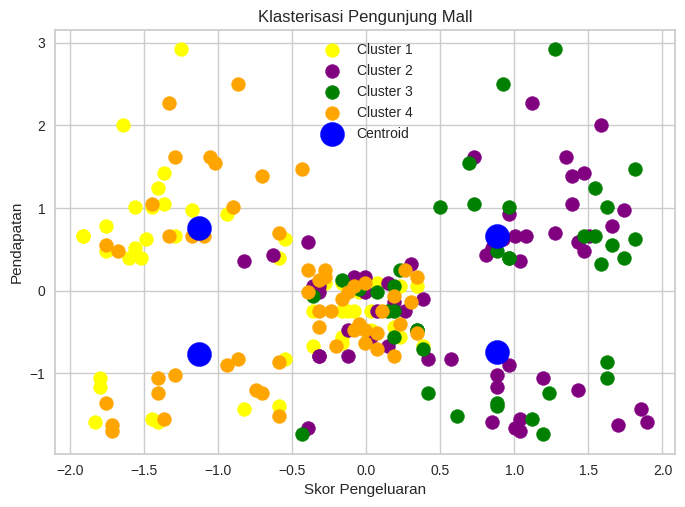

In [276]:
#visulalisasi Cluster dari dataset clustering customer

plt.scatter(x['Spending Score (1-100)'][y_predict == 0], x['Annual Income (k$)'][y_predict == 0], s = 100,
            c = 'yellow', label = 'Cluster 1') #for first cluster
plt.scatter(x['Spending Score (1-100)'][y_predict == 1], x['Annual Income (k$)'][y_predict == 1], s = 100,
            c = 'purple', label = 'Cluster 2') #for second cluster
plt.scatter(x['Spending Score (1-100)'][y_predict == 2], x['Annual Income (k$)'][y_predict == 2], s = 100,
            c = 'green', label = 'Cluster 3') #for third cluster
plt.scatter(x['Spending Score (1-100)'][y_predict == 3], x['Annual Income (k$)'][y_predict == 3], s = 100,
            c = 'orange', label = 'Cluster 4') #for fourth cluster

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s = 300, c = 'blue', label = 'Centroid')

plt.title('Klasterisasi Pengunjung Mall')
plt.xlabel('Skor Pengeluaran')
plt.ylabel('Pendapatan')
plt.legend()
plt.show()

In [277]:
#Menghitung index validasi internal dengan metode sillhoute

km = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)

km.fit_predict(x)

score1 = silhouette_score(x, km.labels_, metric='euclidean')
print('Silhouetter Score: %.4f' % score1)

Silhouetter Score: 0.4336


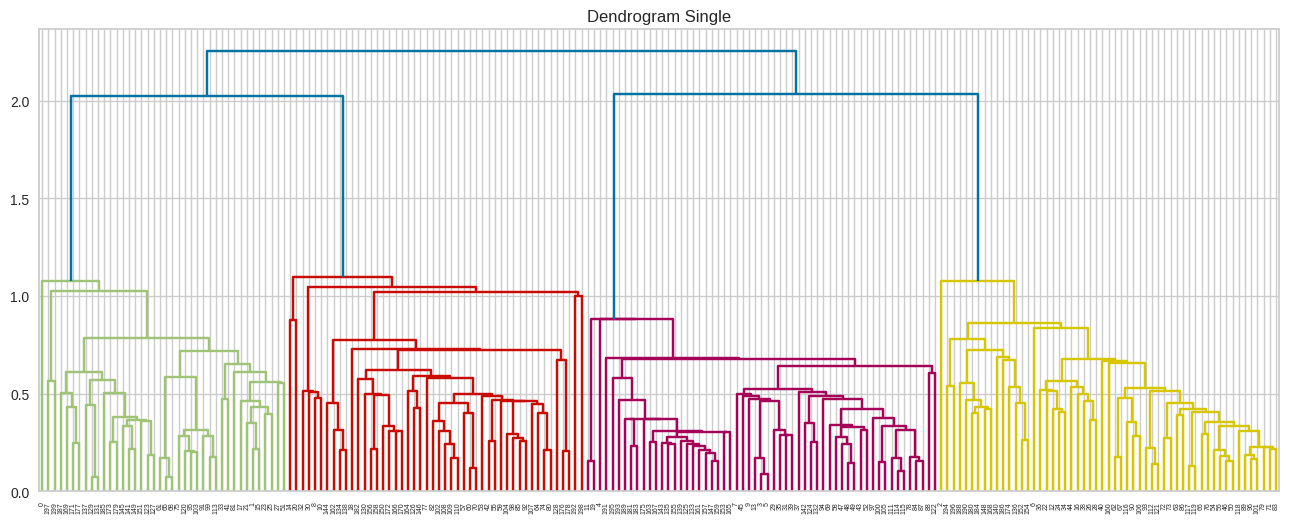

In [278]:
## Buat dendogram untuk mengetahui jumlah cluster yang optimal

plt.figure(figsize=(16,6))
model = AgglomerativeClustering(linkage='single')
labels = model.fit_predict(x)
dendrogram1 = sch.dendrogram(sch.linkage(x, method  = "single"))

plt.title('Dendrogram Single')
plt.show()

In [279]:
# Menghitung skor Silhouette
silhouette_avg = silhouette_score(x, labels)

# Menampilkan skor Silhouette
print("Skor Silhouette:", silhouette_avg)

Skor Silhouette: 0.2680245243895085


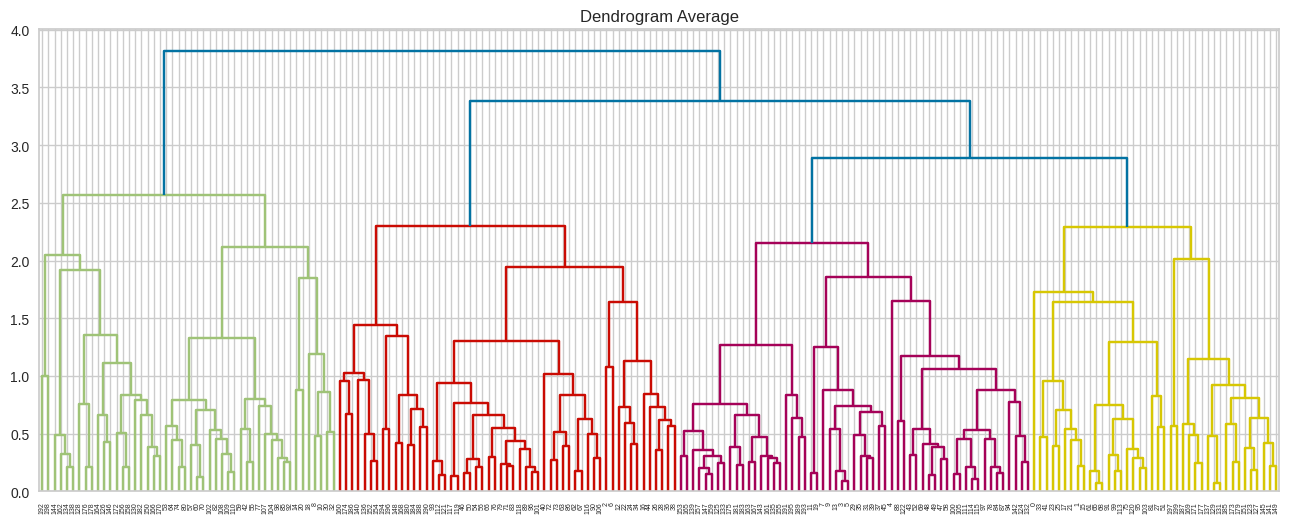

In [280]:
plt.figure(figsize=(16,6))
model2 = AgglomerativeClustering(linkage='average')
labels2 = model2.fit_predict(x)
dendrogram1 = sch.dendrogram(sch.linkage(x, method  = "average"))

plt.title('Dendrogram Average')
plt.show()

In [281]:
# Menghitung skor Silhouette
silhouette_avg2 = silhouette_score(x, labels2)

# Menampilkan skor Silhouette
print("Skor Silhouette:", silhouette_avg2)

Skor Silhouette: 0.32861028909232476


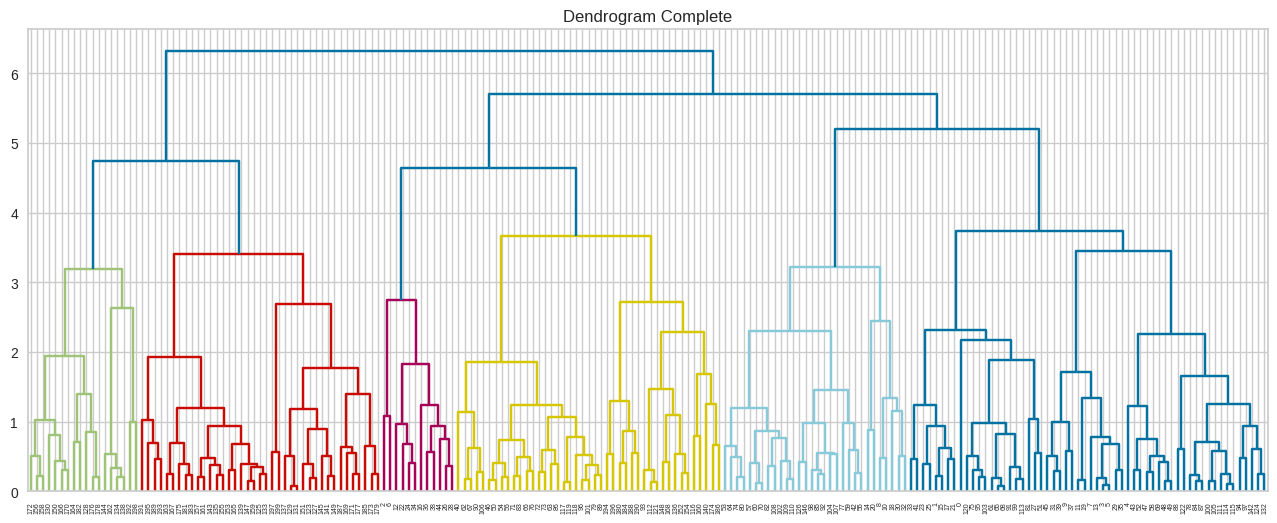

In [282]:
plt.figure(figsize=(16,6))
model3 = AgglomerativeClustering(linkage='complete')
labels3 = model3.fit_predict(x)
dendrogram1 = sch.dendrogram(sch.linkage(x, method  = "complete"))

plt.title('Dendrogram Complete')
plt.show()

In [283]:
# Menghitung skor Silhouette
silhouette_avg3 = silhouette_score(x, labels3)

# Menampilkan skor Silhouette
print("Skor Silhouette:", silhouette_avg3)

Skor Silhouette: 0.14652818579628885


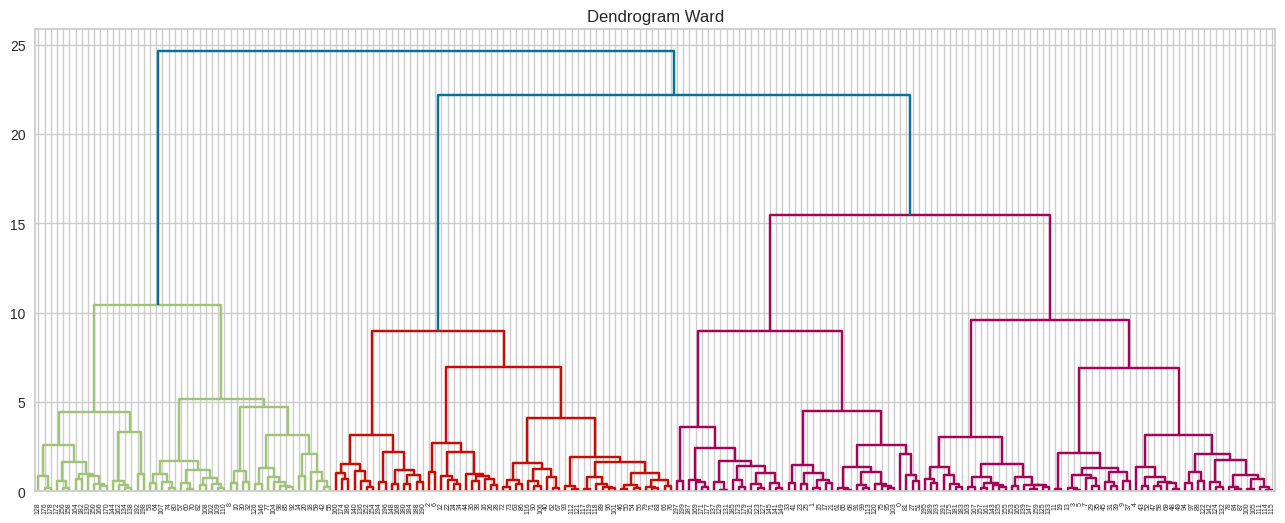

In [284]:
plt.figure(figsize=(16,6))
model4 = AgglomerativeClustering(linkage='ward')
labels4 = model4.fit_predict(x)
dendrogram1 = sch.dendrogram(sch.linkage(x, method  = "ward"))

plt.title('Dendrogram Ward')
plt.show()

In [285]:
# Menghitung skor Silhouette
silhouette_avg4 = silhouette_score(x, labels4)

# Menampilkan skor Silhouette
print("Skor Silhouette:", silhouette_avg4)

Skor Silhouette: 0.32861028909232476


In [286]:
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage ='average')
data_pca = x
y_hc = hc.fit_predict(data_pca)
y_hc

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([1, 1, 2, 3, 3, 3, 2, 3, 0, 3, 0, 3, 2, 3, 0, 1, 2, 1, 0, 3, 0, 1,
       2, 1, 2, 1, 2, 1, 2, 3, 0, 3, 0, 1, 2, 3, 2, 3, 2, 3, 2, 1, 0, 3,
       2, 3, 2, 3, 3, 3, 2, 1, 3, 0, 2, 0, 2, 0, 3, 0, 0, 1, 2, 2, 0, 1,
       2, 2, 1, 3, 0, 2, 2, 2, 0, 1, 2, 0, 3, 2, 0, 1, 0, 2, 3, 0, 2, 3,
       3, 2, 2, 1, 0, 2, 3, 1, 2, 3, 0, 1, 3, 2, 0, 1, 0, 3, 2, 0, 0, 0,
       0, 3, 2, 1, 3, 3, 2, 2, 2, 2, 1, 2, 3, 1, 3, 3, 0, 1, 0, 1, 0, 1,
       3, 3, 0, 3, 2, 1, 0, 3, 2, 1, 3, 3, 0, 1, 0, 3, 2, 1, 0, 1, 2, 3,
       2, 3, 0, 3, 0, 3, 2, 3, 0, 3, 0, 3, 0, 3, 2, 1, 0, 1, 0, 1, 2, 3,
       0, 1, 0, 1, 2, 3, 0, 3, 2, 1, 2, 1, 2, 3, 2, 3, 0, 3, 2, 3, 2, 1,
       0, 1])